<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataScience-Practice-/blob/master/MLbasic4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
car = pd.read_csv('/content/drive/MyDrive/MachineLearning/BasicsPrac/Car_Purchasing_Data.csv')

In [3]:
car.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [5]:
car.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [6]:
car['Country'].unique()

array(['USA'], dtype=object)

In [7]:
car = car.drop(columns=['Customer Name','Customer e-mail','Country'])
car

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [8]:
car.skew(axis=0)

Gender                -0.024074
Age                    0.008082
Annual Salary         -0.087478
Credit Card Debt      -0.063724
Net Worth              0.139755
Car Purchase Amount   -0.030791
dtype: float64

In [9]:
import seaborn as sns

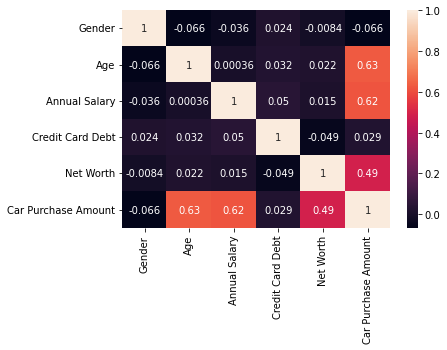

In [10]:
import plotly.express as px
corr_rel=car.corr()
sns.heatmap(corr_rel,annot=True)

In [11]:
corr_rel = car.corr()
px.imshow(corr_rel,origin=True)

In [12]:
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab


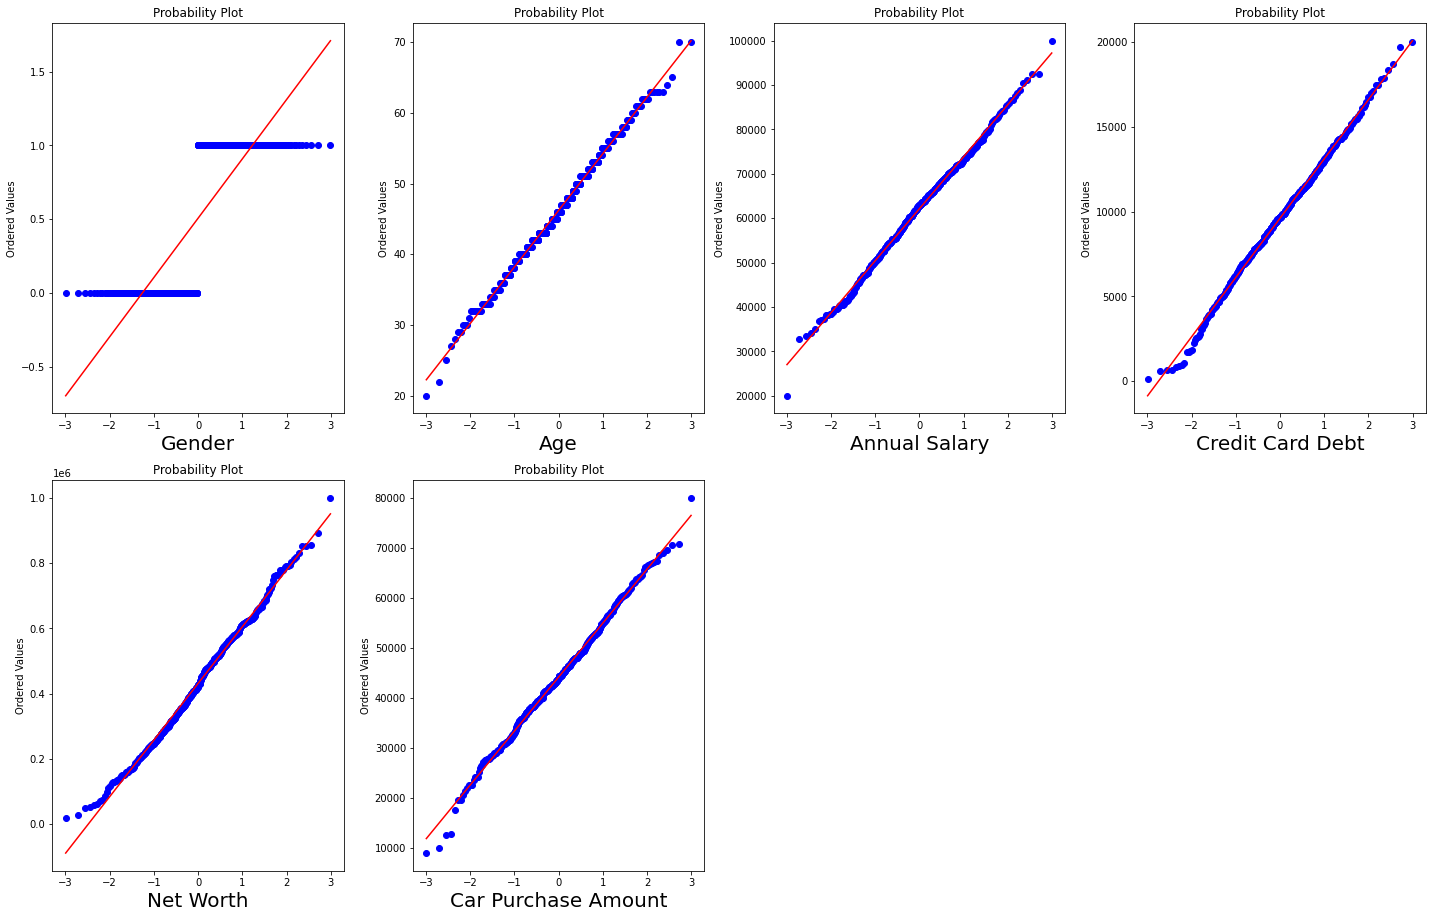

In [13]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnumber =1

for column in car:
  if plotnumber <=6:
    ax=plt.subplot(4,4,plotnumber)
    st.probplot(car[column],dist='norm',plot=pylab)
    plt.xlabel(column,fontsize=20)

    plotnumber +=1

plt.tight_layout()

In [14]:
car.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [15]:
y=car['Car Purchase Amount']
X = car.drop(columns=['Car Purchase Amount'])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [18]:
x_scaled

array([[-1.01207287, -0.52916784,  0.05857619,  0.57427133, -1.11046945],
       [-1.01207287, -0.65444432,  0.38657041, -0.0099515 ,  0.57392937],
       [ 0.98807114, -0.40389136, -0.71236095,  0.4454518 ,  1.19397625],
       ...,
       [ 0.98807114,  0.97414989,  0.57832106,  0.28802326,  1.92114437],
       [ 0.98807114,  1.60053227, -1.05333541,  1.26384749, -0.54019026],
       [ 0.98807114,  0.09721455, -0.06470949, -0.06205457,  0.18153098]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=100)

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
lr.score(x_test,y_test)

0.9995042671973304

In [22]:
def adj_r2(x,y):
  r2=lr.score(x,y)
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [23]:
adj_r2(x_test,y_test)

0.9994834380879746

In [24]:
y_pred = lr.predict(x_test)
y_pred

array([49367.98209769, 43823.61107452, 48427.17590242, 35642.1952827 ,
       31564.49865884, 46125.18668859, 51137.30241663, 54640.77018539,
       63186.01239547, 47305.83438824, 38570.27434207, 63922.95754868,
       44245.27404978, 24506.40512954, 31771.9191542 , 45301.77456884,
       63616.00041833, 32932.93952605, 56924.87064472, 59615.04800742,
       27436.47864643, 30545.2503099 , 39196.50847989, 51171.75187295,
       51694.57180172, 46825.17167542, 31261.27349295, 22613.77061185,
       43112.94783526, 44368.75983086, 48670.64228208, 53197.36016313,
        8877.82797919, 62999.47535847, 67229.87814331, 38458.2423563 ,
       40347.48309019, 38065.07081532, 10138.76868313, 29256.66840409,
       41818.84555246, 55054.00208462, 42954.84145642, 38939.61522445,
       40782.31089799, 39694.28244181, 44318.4057996 , 45940.62549891,
       66736.22589874, 41697.69486528, 47715.61364879, 37083.15657113,
       65740.31666146, 31832.23130279, 45424.07594403, 51066.1317237 ,
      

In [26]:
from sklearn.metrics import mean_squared_error as mse
z = mse(y_test,y_pred)
z

62792.739387410984

In [27]:
s= np.sqrt(z)
s

250.5847948048943

In [28]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

220.25311141390344

In [29]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test,y_pred)*100

0.5614265752748724

In [30]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



LassoCV(cv=10, max_iter=100000, normalize=True)

In [32]:
alpha = lasscv.alpha_
alpha

0.32939391610817526

In [33]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.32939391610817526)

In [35]:
lasso_reg.score(x_test,y_test)

0.9995045313758618

In [36]:
ridgecv = RidgeCV(alphas=(0.003,0.01,0.1),cv=10)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.003, 0.01 , 0.1  ]), cv=10)

In [37]:
ridgecv.alpha_

0.01

In [40]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [41]:
ridge_model.score(x_test,y_test)

0.9995044360250444